In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv("../Datasets/train.csv",usecols=["Age","Fare","Survived"])
df.sample(5)

,Survived,Age,Fare
130,0,33.0,7.8958
369,1,24.0,69.3000
414,1,44.0,7.9250
287,0,22.0,7.8958
726,1,30.0,21.0000


In [17]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.25)

In [23]:
from sklearn.impute import KNNImputer

imp=KNNImputer()

imp.fit(X_train)

X_train_trans=imp.transform(X_train)
X_test_trans=imp.transform(X_test)

X_train_trans=pd.DataFrame(X_train_trans,columns=df.columns)
X_test_trans=pd.DataFrame(X_test_trans,columns=df.columns)

In [24]:
X_test_trans

,Survived,Age,Fare
0,0.0,70.0,10.5000
1,0.0,42.0,8.4042
2,0.0,55.0,30.5000
3,0.0,25.4,7.8958
4,0.0,65.0,26.5500
...,...,...,...
218,0.0,31.1,7.2250
219,1.0,16.0,86.5000
220,0.0,36.4,0.0000
221,0.0,39.0,24.1500


In [25]:
# checking changes in variance due to KNN imputation
print("Orignal Variance ",X_train["Age"].var())
print("New Variance",X_train_trans["Age"].var())

Orignal Variance  211.44367958863495
New Variance 180.82574895434018


C:\Users\panka\AppData\Local\Temp\ipykernel_9788\1662053704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"],color="red",hist=False,label="Orignal Age")
C:\Users\panka\AppData\Local\Temp\ipykernel_9788\1662053704.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

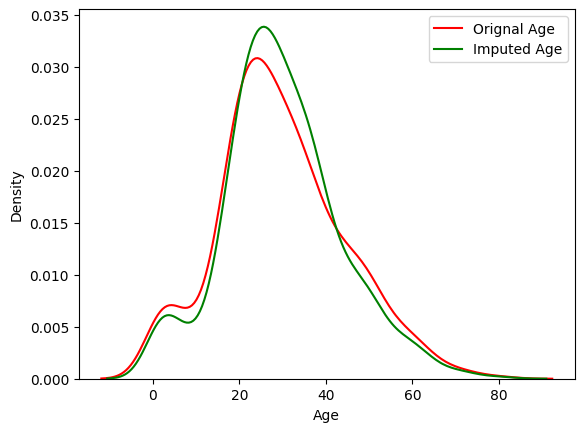

In [27]:
sns.distplot(X_train["Age"],color="red",hist=False,label="Orignal Age")
sns.distplot(X_train_trans["Age"],color="green",hist=False,label="Imputed Age")
plt.legend()

# Iterative Imputer

In [83]:
from sklearn.linear_model import LinearRegression
def IterativeImputer(new_df):
    columns=df.columns
    for i in columns:
        new_df[i]=df[i].fillna(df[i].mean())

    for j in range(10):
        for i in columns:
            missing_mask=new_df[i].isnull()
            if missing_mask.sum()==0:
                continue
            notMissing=~missing
            X_train=df.loc(notMissing,columns-i)
            Y_train=df.loc(notMissing,i)
            X_pred=df.loc(Missing,columns-i)
            lr=LinearRegression()
            lr.fit(X_train,Y_train)
            new_df.loc[missing_mask,i]=lr.predict(X_pred)
            
    return new_df
    
df=pd.read_csv("../Datasets/train.csv",usecols=["Age","Fare","Survived"])
df.tail()
        

,Survived,Age,Fare
886,0,27.0,13.00
887,1,19.0,30.00
888,0,NaN,23.45
889,1,26.0,30.00
890,0,32.0,7.75


In [84]:
ndf=IterativeImputer(df)
df.tail()

,Survived,Age,Fare
886,0,27.000000,13.00
887,1,19.000000,30.00
888,0,29.699118,23.45
889,1,26.000000,30.00
890,0,32.000000,7.75


C:\Users\panka\AppData\Local\Temp\ipykernel_9788\3859900841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"],color="red",hist=False,label="Orignal Age")
C:\Users\panka\AppData\Local\Temp\ipykernel_9788\3859900841.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

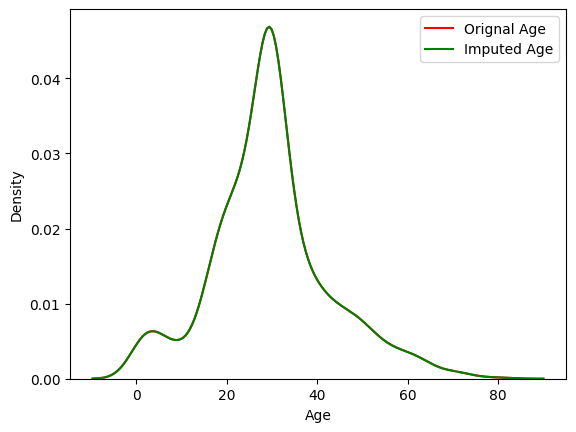

In [85]:
sns.distplot(df["Age"],color="red",hist=False,label="Orignal Age")
sns.distplot(ndf["Age"],color="green",hist=False,label="Imputed Age")
plt.legend()

In [86]:
print("Orignal Variance ",df["Age"].var())
print("New Variance",ndf["Age"].var())

Orignal Variance  169.0523999372108
New Variance 169.0523999372108


In [88]:
# by sklearn
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.25)


In [100]:
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer

imp=IterativeImputer(estimator=LinearRegression(), 
                           max_iter=10,random_state=42)
# Setting random_state=42 (or any fixed integer) ensures that the results are reproducible. Every time you run the code, you'll get the same train-test split, same model behavior, and same imputed values.
imp.fit(X_train)
X_train_trans=imp.transform(X_train)
X_test_trans=imp.transform(X_test)

X_train_trans=pd.DataFrame(X_train_trans,columns=X_train.columns)
X_test_trans=pd.DataFrame(X_test_trans,columns=X_train.columns)

C:\Users\panka\AppData\Local\Temp\ipykernel_9788\1662053704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"],color="red",hist=False,label="Orignal Age")
C:\Users\panka\AppData\Local\Temp\ipykernel_9788\1662053704.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

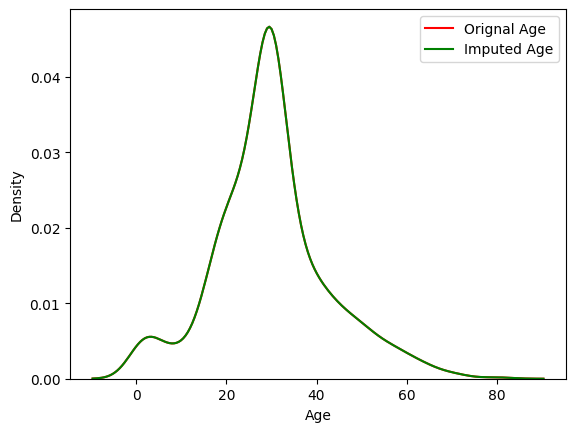

In [101]:
sns.distplot(X_train["Age"],color="red",hist=False,label="Orignal Age")
sns.distplot(X_train_trans["Age"],color="green",hist=False,label="Imputed Age")
plt.legend()